In [1]:
%reload_ext autoreload
%autoreload 2

In [18]:
from gcn.dataloader import YooChooseDataset
from gcn.model import SAGEConv

In [13]:
from torch_geometric import utils, data
from matplotlib import pyplot as plt
import networkx as nx
import torch

In [4]:
ds = YooChooseDataset(root="/home/pranjal/GCN/pytorch-gcn/tmp/")

2020-08-24 22:54:52.018 | INFO     | gcn.dataloader:raw_file_names:32 - Required files check!
2020-08-24 22:54:52.021 | INFO     | gcn.dataloader:initialize_df:49 - Loading dataset...


Processing...


/home/pranjal/miniconda3/envs/gcn/lib/python3.8/site-packages/torch_geometric/data/dataset.py:92: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  self._process()
2020-08-24 22:55:17.397 | INFO     | gcn.dataloader:initialize_df:54 - Removing sessions with less than 3 item ids...
2020-08-24 22:55:31.014 | INFO     | gcn.dataloader:initialize_df:62 - Sampling 250000 sessions...
2020-08-24 22:55:34.299 | INFO     | gcn.dataloader:initialize_df:69 - Mapping item ids to smaller range...
2020-08-24 22:55:34.435 | INFO     | gcn.dataloader:initialize_df:74 - Determining the target class of the sessions (buy/not buy)...
2020-08-24 22:55:35.295 | INFO     | gcn.dataloader:initialize_df:80 - Loading dataset done!
2020-08-24 22:55:35.296 | INFO     | gcn.dataloader:process:86 - Processing dataset...
100%|██████████| 250000/250000 [07:42<00:00, 540.24it/s]
2020-08-24 23:03:19.348 | INFO     | gcn.dataloader:process:110 - Completed processing!
20

Done!


In [6]:
g_sample = utils.to_networkx(ds[1000])

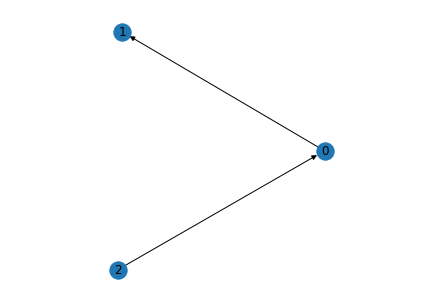

In [7]:
nx.draw_kamada_kawai(g_sample,with_labels=True)

In [8]:
list(g_sample.adjacency())

[(0, {1: {}}), (1, {}), (2, {2: {}, 0: {}})]

In [9]:
ds[1000].x

tensor([[11956],
        [19581],
        [19587]])

In [10]:
ds[1000].edge_index

tensor([[2, 2, 2, 0],
        [2, 2, 0, 1]])

In [11]:
dl = data.DataLoader(ds)

In [19]:
item_embedding = torch.nn.Embedding(num_embeddings=ds.num_embeddings, embedding_dim=128)
conv1 = SAGEConv(ds.num_embeddings, 128)

In [20]:
for tr in dl:
    x, edge_index, batch = tr.x, tr.edge_index, tr.batch
    x = item_embedding(x)
    x = x.squeeze(1)
    y = conv1(x, edge_index)
    break

{'x_j': tensor([[-1.5221e+00, -1.4371e-01,  9.6662e-01,  4.6188e-01,  4.7348e-01,
          2.6144e+00,  9.8917e-01, -1.6746e+00,  1.1619e+00, -2.0393e-01,
         -1.7446e-02,  3.4510e-01, -7.2260e-01, -3.4675e-01, -1.8896e-02,
          2.9418e+00, -5.3043e-01, -1.6757e+00, -7.3290e-01, -7.6428e-01,
         -5.6603e-01,  1.6974e+00, -8.7238e-01,  2.1946e-01, -1.2636e-01,
         -1.1942e+00, -1.3608e+00,  1.6836e-01, -1.5938e-01,  1.1587e+00,
         -8.6225e-01, -9.5430e-01,  2.2718e-01, -4.2902e-01, -7.6824e-02,
         -5.9915e-01, -1.0240e+00,  1.0141e+00, -4.8579e-01, -3.3743e-04,
          2.6972e-01, -1.6407e+00, -1.6036e+00, -2.2635e+00, -1.3803e+00,
          1.0574e+00, -1.0005e+00,  5.8273e-01, -2.5296e-01,  1.1079e+00,
          5.8060e-01, -8.8053e-01,  1.7115e-02,  2.8928e-01,  5.5552e-01,
          1.1360e-01,  7.1926e-01, -1.8682e-01, -1.0655e+00,  4.8070e-01,
         -2.6548e-01,  1.3046e+00, -1.7333e-01,  4.7286e-02, -2.3143e+00,
         -1.5305e+00, -1.2577e

RuntimeError: size mismatch, m1: [7 x 128], m2: [28140 x 128] at /opt/conda/conda-bld/pytorch_1595629395347/work/aten/src/TH/generic/THTensorMath.cpp:41

In [17]:
x.shape

torch.Size([4, 128])